In [148]:
import os
os.environ["OPENAI_API_KEY"]='ur key here'


In [156]:
import pandas as pd
df=pd.read_csv("reviews.csv")

In [157]:
from langchain_experimental.agents.agent_toolkits import create_csv_agent
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(temperature=1.0)

In [158]:
agent_executer=create_csv_agent(llm,'reviews.csv')

In [159]:
print("No of rows:",len(df.index) )

No of rows: 878


In [160]:
print("No of unique PIDs",df['PID'].nunique())

No of unique PIDs 28


In [142]:
agent_executer.invoke("give me Parent Listing wise reviews count in new line?")


{'input': 'give me Parent Listing wise reviews count in new line?',
 'output': 'Parent Listing\nAereo Plus             258\nAery                    15\nCharisma Plus          192\nMarvo Anti-Mosquito     21\nOptima Mini             34\nSilencio Mini          198\nSuperb                 122\nSuperb Neo               2\nSuperia                  8\nSuperia SP01             1\nSuperia SP02            16\nSuperia SP04             8\nSuperia SP05             3'}

In [150]:
agent_executer.invoke("in ratings column for -if rating 4, 5 it is positive ratings and 3 is neutral and 1,2 is negative ratings give me count of them?")

{'input': 'in ratings column for -if rating 4, 5 it is positive ratings and 3 is neutral and 1,2 is negative ratings give me count of them?',
 'output': 'There are 496 positive ratings (5), 151 positive ratings (4), 74 neutral ratings (3), 38 negative ratings (2), and 119 negative ratings (1) in the dataframe.'}

In [151]:
agent_executer.invoke("give me rating count of all ratings?")

{'input': 'give me rating count of all ratings?',
 'output': 'Rating 5 has 496 counts, rating 4 has 151 counts, rating 1 has 119 counts, rating 3 has 74 counts, and rating 2 has 38 counts.'}

In [81]:
agent_executer.invoke("in ratings column for -if rating 4, 5 it is positive ratings and 3 is neutral and 1,2 is negative ratings give me count of positive ,negative and neutral for each unique Parent Listing? in oreder wise iin tabular form")



> Entering new AgentExecutor chain...
Thought: We need to categorize the ratings into positive, negative, and neutral based on the values provided. Then, we can group the data by unique Parent Listing and count the occurrences of each category.
Action: python_repl_ast
Action Input: df['Sentiment'] = df['Rating'].apply(lambda x: 'Positive' if x in [4, 5] else 'Neutral' if x == 3 else 'Negative')We have categorized the ratings into sentiments based on the values.
Action: python_repl_ast
Action Input: df_grouped = df.groupby(['Parent Listing', 'Sentiment']).size().unstack(fill_value=0)We have grouped the data by unique Parent Listing and sentiment, and counted the occurrences of each sentiment.
Action: python_repl_ast
Action Input: print(df_grouped)Sentiment            Negative  Neutral  Positive
Parent Listing                                  
Aereo Plus                 51       27       180
Aery                        2        0        13
Charisma Plus              35       35       1

{'input': 'in ratings column for -if rating 4, 5 it is positive ratings and 3 is neutral and 1,2 is negative ratings give me count of positive ,negative and neutral for each unique Parent Listing? in oreder wise iin tabular form',
 'output': 'The count of positive, negative, and neutral sentiments for each unique Parent Listing is shown in the table above.'}

{'input': 'give python code for line graph where x axis has date which has month and year only, y axis has sum of positive reviws , sum of negative review and sum total reviews',
 'output': 'The line graph has been created with the x-axis representing the month and year, and the y-axis showing the sum of positive reviews, sum of negative reviews, and the total reviews.'}

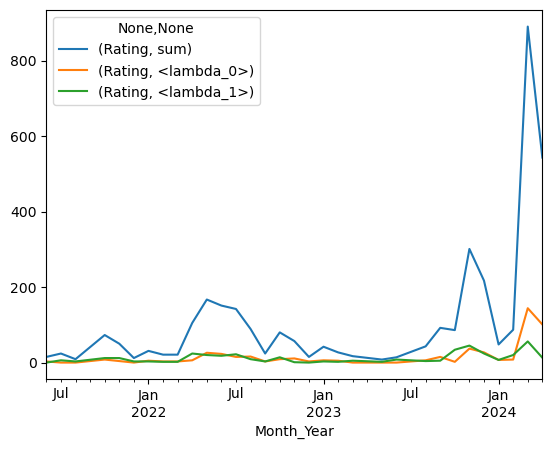

In [152]:
agent_executer.invoke("give python code for line graph where x axis has date which has month and year only, y axis has sum of positive reviws , sum of negative review and sum total reviews")

In [161]:
agent_executer.invoke("make wordcloud for both positive and negative ratings separtivly ?")

{'input': 'make wordcloud for both positive and negative ratings separtivly ?',
 'output': 'I should find an alternate approach to extract positive reviews and combine them into a single string.'}

In [162]:
agent_executer.invoke("provide me all other insights which you can generate fromm the data")

{'input': 'provide me all other insights which you can generate fromm the data',
 'output': 'Further insights from the data include unique value counts for each column, summary statistics for the numeric columns, and potential additional analysis on reviews and locations.'}